In [1]:
!pip install matplotlib numpy sunpy astropy skyfield

In [2]:
import matplotlib.pyplot as plt  # Plots
import numpy as np  # Math and stats
from astropy.coordinates import SkyCoord  # Cordinate translation
from sunpy.coordinates import get_body_heliographic_stonyhurst  # Planets positions
from astropy.time import Time  # Astropy time
from skyfield.api import load
from skyfield.api import Topos
import math

In [6]:
%matplotlib inline

In [7]:
obstime1 = Time('2020-06-11T22:00:00.000')
obstime2 = Time('2020-07-11T22:00:00.000')
planet_list = ['earth', 'venus', 'mars',
               'mercury', 'jupiter', 'neptune', 'uranus']
planet_coord1 = [get_body_heliographic_stonyhurst(
    planet, time=obstime1) for planet in planet_list]
planet_coord2 = [get_body_heliographic_stonyhurst(
    planet, time=obstime2) for planet in planet_list]

ts = load.timescale(builtin=True)
planets = load('de421.bsp')
earth = planets['earth']
moscow = earth + Topos('55.7558 N', '37.6173 E')
object_list = ['venus', 'mars', 'moon', 'sun']
ts = load.timescale(builtin=True)
t = ts.now()
astrometric = [moscow.at(t).observe(planets[object]) for object in object_list]
data = [x.apparent().altaz() for x in astrometric]  # alt, azi, d

45.168744291430166
45.628570469275445
56.9356718480375


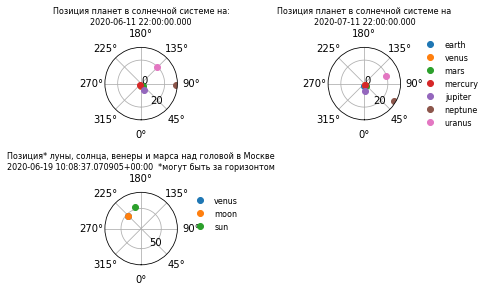

In [8]:
fig = plt.figure()
ax1 = plt.subplot(221, projection='polar')
for planet, coord in zip(planet_list, planet_coord1):
    plt.polar(np.deg2rad(coord.lon), coord.radius, 'o', label=planet)
ax1.set_title(
    'Позиция планет в солнечной системе на:\n2020-06-11 22:00:00.000', fontsize=8, pad=20)
ax2 = plt.subplot(222, projection='polar')
for planet, coord in zip(planet_list, planet_coord2):
    plt.polar(np.deg2rad(coord.lon), coord.radius, 'o', label=planet)
ax2.set_title(
    'Позиция планет в солнечной системе на\n2020-07-11 22:00:00.000', fontsize=8, pad=20)
plt.legend(loc='best', frameon=False, fontsize=8, bbox_to_anchor=(1.2, 1.2))
ax1.set_theta_zero_location('S', offset=0)
ax2.set_theta_zero_location('S', offset=0)
ax3 = fig.add_subplot(223, projection='polar')
for pos, planet in zip(data, object_list):
    if pos[0].degrees >= 0:
        plt.polar(pos[1].radians, pos[0].degrees, 'o', label=planet)
        print(pos[0].degrees)
ax3.set_theta_zero_location('S', offset=0)
ax3.set_rlim(0, 90)

plt.legend(loc='best', frameon=False, fontsize=8, bbox_to_anchor=(1.1, 1.05))
ax3.set_title(
    f'Позиция* луны, солнца, венеры и марса над головой в Москве\n{t.utc_datetime()}  *могут быть за горизонтом',
    fontsize=8, pad=20)
plt.subplots_adjust(hspace=1, wspace=1)